In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df= pd.read_csv("List of Countries by Sugarcane Production.csv")

In [56]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# Data Cleaning


In [57]:
df.drop(columns='Unnamed: 0', inplace= True)

In [58]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [59]:
df['Production (Tons)']=df['Production (Tons)'].str.replace(".", "")
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace(".", "").str.replace(",","")
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace(".", "")
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace(".", "").str.replace(",","")

In [60]:
df.rename(columns={"Production (Tons)" : "Production(Tons)"}, inplace = True)
df.rename(columns={"Production per Person (Kg)": 'Production_per_Person(Kg)'}, inplace = True)
df.rename(columns={"Acreage (Hectare)": "Acreage(Hectare)"}, inplace= True)
df.rename(columns={"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    103 non-null    object
 1   Continent                  103 non-null    object
 2   Production(Tons)           103 non-null    object
 3   Production_per_Person(Kg)  103 non-null    object
 4   Acreage(Hectare)           102 non-null    object
 5   Yield(Kg/Hectare)          102 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [62]:
df['Production(Tons)']=df['Production(Tons)'].astype('float')
df['Production_per_Person(Kg)']=df['Production_per_Person(Kg)'].astype('float')
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype('float')
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype('float')

In [63]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.030000e+02,1.030000e+02,1.020000e+02,1.020000e+02
mean,1.832407e+07,4.084763e+05,2.498981e+05,5.018502e+05
std,8.379760e+07,8.636106e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,4.298850e+04,1.015600e+04,1.104000e+03,2.487505e+05
50%,1.422432e+06,7.960600e+04,1.655800e+04,5.102500e+05
75%,6.145648e+06,2.755895e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


In [64]:
df.isnull().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [65]:
df['Acreage(Hectare)'].fillna(df['Acreage(Hectare)'].mode(), inplace=True)

In [66]:
df['Acreage(Hectare)']

0      10226205.0
1       4950000.0
2       1675215.0
3       1336575.0
4       1130820.0
          ...    
98            3.0
99            NaN
100           2.0
101           1.0
102           0.0
Name: Acreage(Hectare), Length: 103, dtype: float64

In [67]:
df['Yield(Kg/Hectare)'].fillna(df['Yield(Kg/Hectare)'].mode(), inplace = True)

In [68]:
df.isnull().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            0
dtype: int64

In [69]:
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [70]:
df.shape

(103, 6)

In [71]:
df.nunique()

Country                      103
Continent                      6
Production(Tons)             103
Production_per_Person(Kg)    102
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

## Univariate analysis 

<Axes: xlabel='Continent', ylabel='count'>

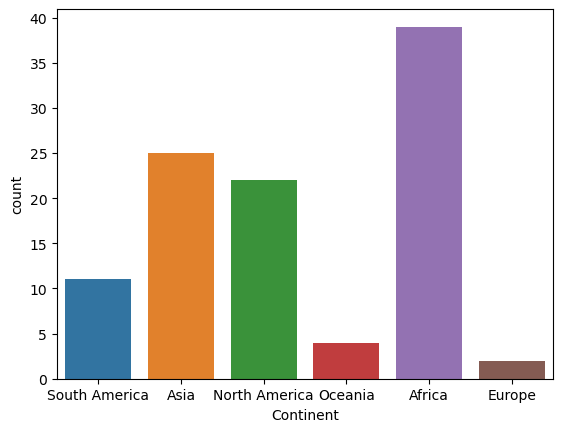

In [72]:
sns.countplot(df, x='Continent')

<Axes: ylabel='count'>

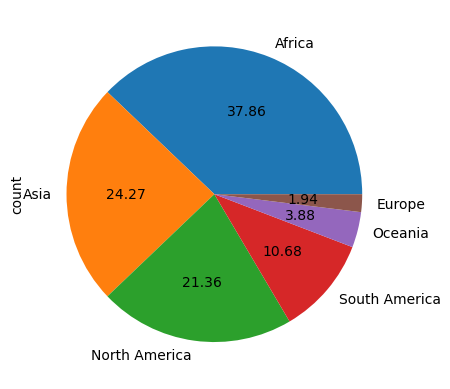

In [73]:
df['Continent'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: xlabel='Continent'>

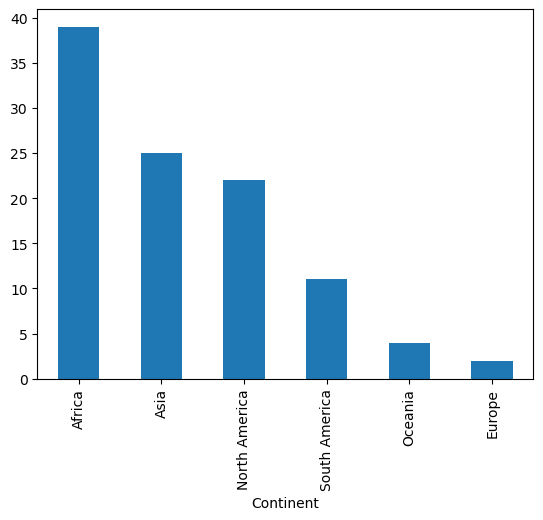

In [74]:
df['Continent'].value_counts().plot(kind='bar')

/var/folders/xq/83w2r7w11d32vwchv5rsj7mc0000gn/T/ipykernel_8502/1779851346.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
/var/folders/xq/83w2r7w11d32vwchv5rsj7mc0000gn/T/ipykernel_8502/1779851346.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

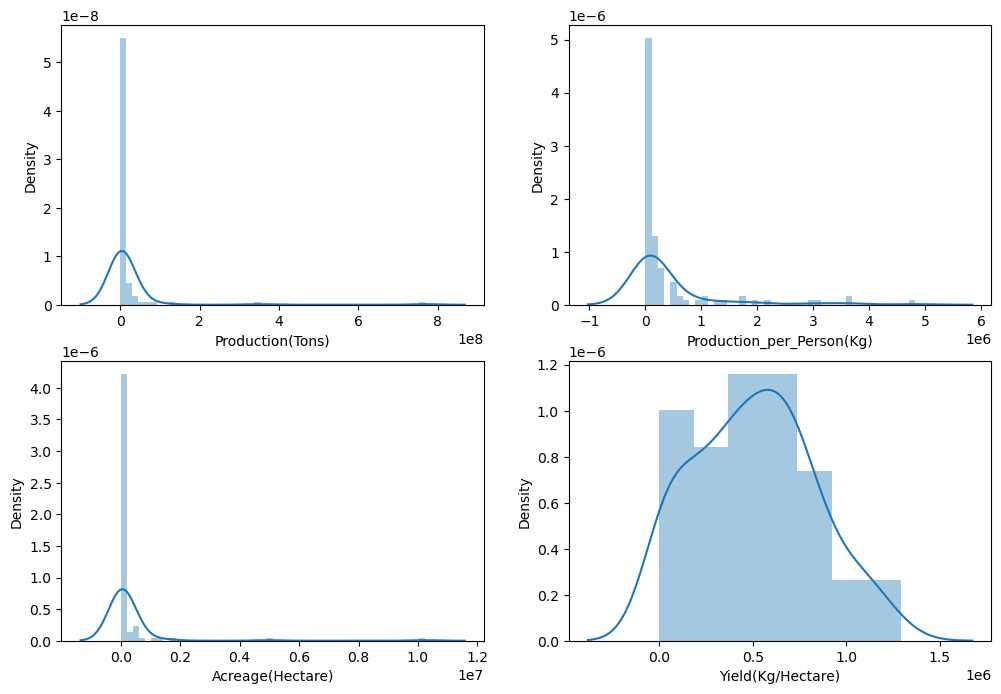

In [75]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

## Checking outliers

Text(0.5, 1.0, 'Yield(Kg/Hectare)')

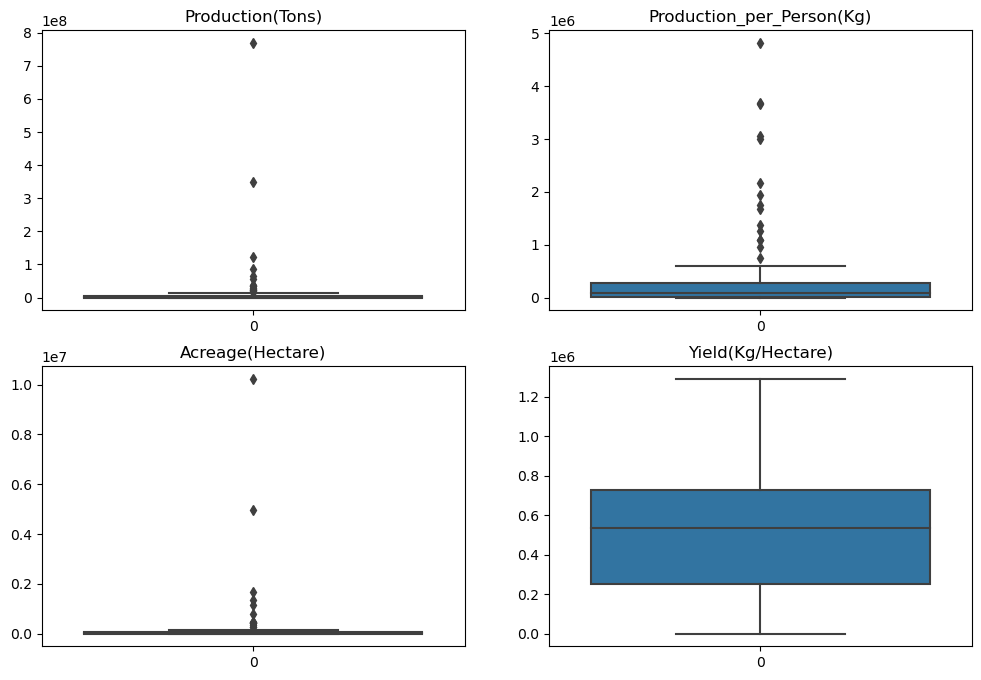

In [76]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.title("Production_per_Person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])
plt.title("Yield(Kg/Hectare)")

In [77]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.030000e+02,1.030000e+02,1.020000e+02,1.030000e+02
mean,1.832407e+07,4.084763e+05,2.498981e+05,5.081459e+05
std,8.379760e+07,8.636106e+05,1.137003e+06,3.218024e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,4.298850e+04,1.015600e+04,1.104000e+03,2.490120e+05
50%,1.422432e+06,7.960600e+04,1.655800e+04,5.366840e+05
75%,6.145648e+06,2.755895e+05,8.047400e+04,7.263730e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


In [78]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


## bivariate analysis


In [79]:
df_new=df[['Country','Production(Tons)']].set_index('Country')

In [80]:
df_new.head(10)

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
Mexico,56446821.0
Colombia,36951213.0
Australia,34403004.0
Guatemala,33533403.0


In [81]:
df_new['Production(Tons)_percent']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [82]:
df_new.head()

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,40.727284
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809


In [83]:
df_new['Production(Tons)_percent'].value_counts().sum()

103

<Axes: ylabel='Production(Tons)_percent'>

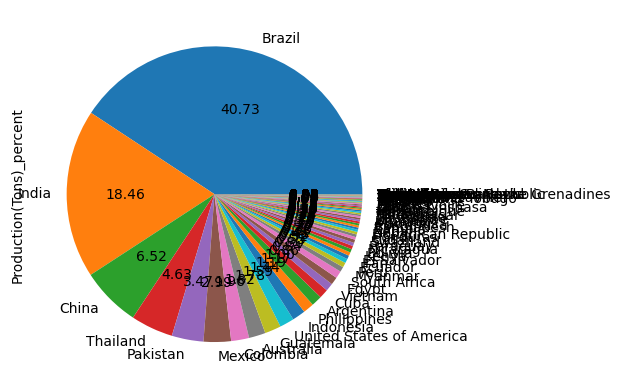

In [84]:
df_new['Production(Tons)_percent'].plot(kind='pie', autopct='%.2f')

In [86]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072728e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Lebanon,97.0,5.139401e-06
Djibouti,53.0,2.808126e-06
Singapore,50.0,2.649176e-06


In [ ]:
# Taking only top five countries and keeping other countries in Others

In [33]:
dfff=df[['Country','Production(Tons)']]


In [34]:
dfff['Production(Tons)']=dfff['Production(Tons)']*100/dfff['Production(Tons)'].sum()

/var/folders/xq/83w2r7w11d32vwchv5rsj7mc0000gn/T/ipykernel_8502/2663834164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfff['Production(Tons)']=dfff['Production(Tons)']*100/dfff['Production(Tons)'].sum()


In [35]:
dfff

,Country,Production(Tons)
0,Brazil,4.072728e+01
1,India,1.846200e+01
2,China,6.520138e+00
3,Thailand,4.634389e+00
4,Pakistan,3.467809e+00
...,...,...
98,Lebanon,5.139401e-06
99,Djibouti,2.808126e-06
100,Singapore,2.649176e-06
101,Samoa,6.358022e-07


In [42]:
countries_to_keep=['India','China','Brazil', 'Thailand', 'Pakistan']


In [45]:
dfff.loc[~dfff['Country'].isin(countries_to_keep),'Country']='Others'

In [46]:
df_filtered=dfff[dfff['Country'].isin(countries_to_keep +['Others'])]

In [47]:
df_filtered['Country'].value_counts()

Country
Others      98
Brazil       1
India        1
China        1
Thailand     1
Pakistan     1
Name: count, dtype: int64

In [48]:
df_filtered

,Country,Production(Tons)
0,Brazil,4.072728e+01
1,India,1.846200e+01
2,China,6.520138e+00
3,Thailand,4.634389e+00
4,Pakistan,3.467809e+00
...,...,...
98,Others,5.139401e-06
99,Others,2.808126e-06
100,Others,2.649176e-06
101,Others,6.358022e-07


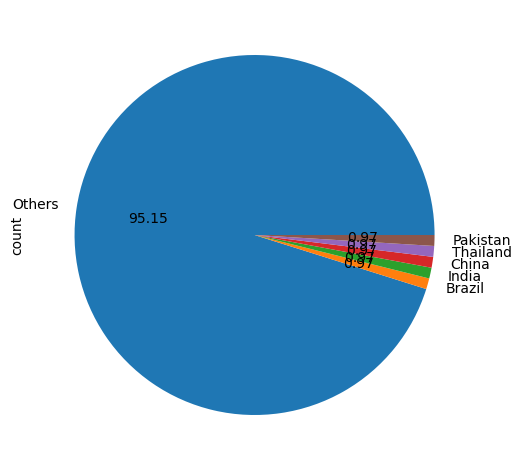

In [52]:
df_filtered['Country'].value_counts().plot(kind='pie', autopct='%.2f')
plt.tight_layout()

<Axes: xlabel='Country'>

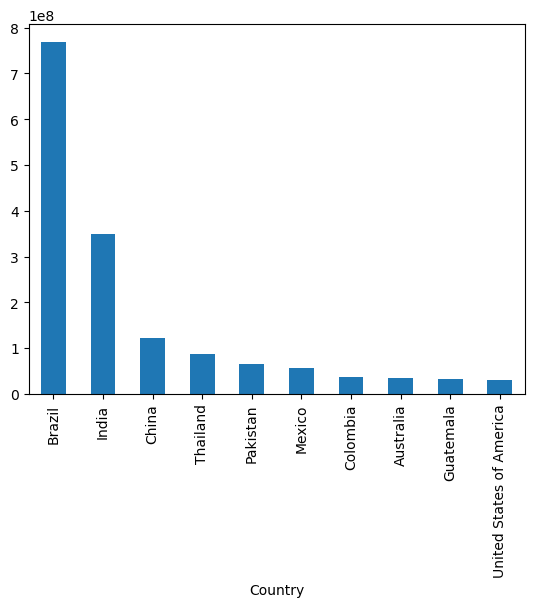

In [96]:
df_new['Production(Tons)'].head(10).plot(kind='bar')

## Country with highest production

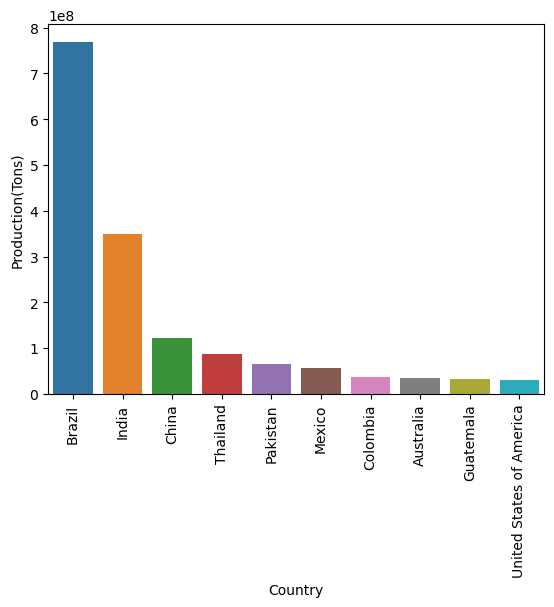

In [107]:
df_prod=df.sort_values("Production(Tons)",ascending =False)
ax= sns.barplot(df_prod.head(10),x="Country", y='Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## Country with highest land

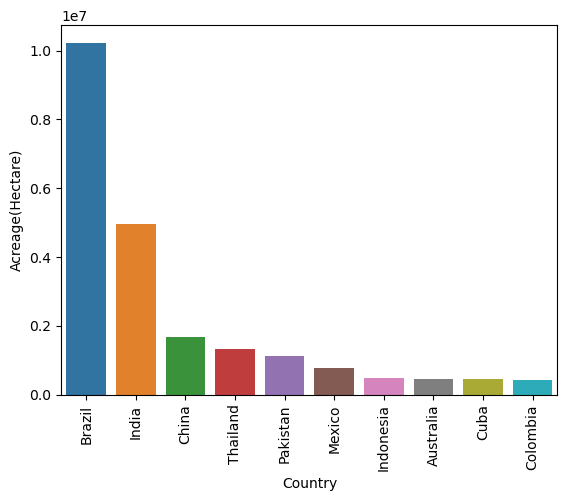

In [104]:
df_acr=df.sort_values("Acreage(Hectare)",ascending=False)
ax1=sns.barplot(df_acr.head(10), x="Country", y='Acreage(Hectare)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.show()

## Country with highest Yield per hecter

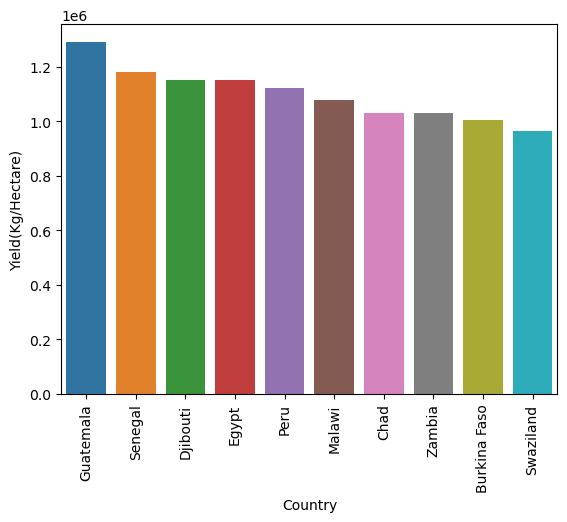

In [111]:
df_yield=df.sort_values("Yield(Kg/Hectare)", ascending=False)
ax2=sns.barplot(df_yield.head(10), x="Country", y="Yield(Kg/Hectare)")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

## highest Production_per_Person(Kg)

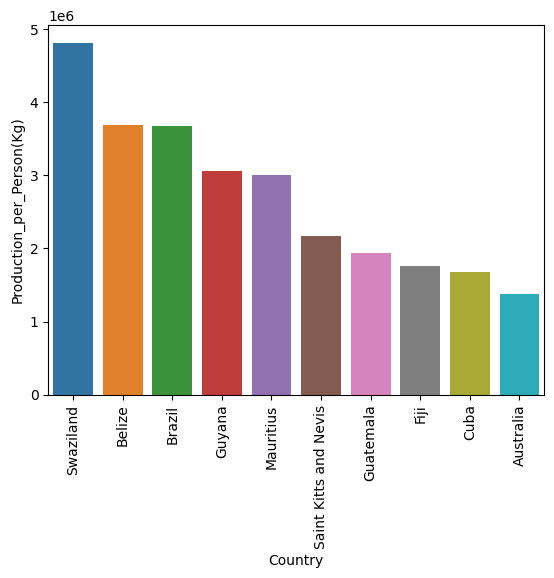

In [113]:
df_per=df.sort_values("Production_per_Person(Kg)", ascending=False)
ax3=sns.barplot(df_per.head(10), x="Country", y="Production_per_Person(Kg)")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90 )
plt.show()

## Co-relation


In [117]:
df_rel=df[['Production_per_Person(Kg)',"Yield(Kg/Hectare)", "Acreage(Hectare)",'Production(Tons)' ]]

In [118]:
df_rel.corr() #closer to 1 is more related 

,Production_per_Person(Kg),Yield(Kg/Hectare),Acreage(Hectare),Production(Tons)
Production_per_Person(Kg),1.000000,0.212616,0.341974,0.352920
Yield(Kg/Hectare),0.212616,1.000000,0.107826,0.114365
Acreage(Hectare),0.341974,0.107826,1.000000,0.997550
Production(Tons),0.352920,0.114365,0.997550,1.000000


<Axes: >

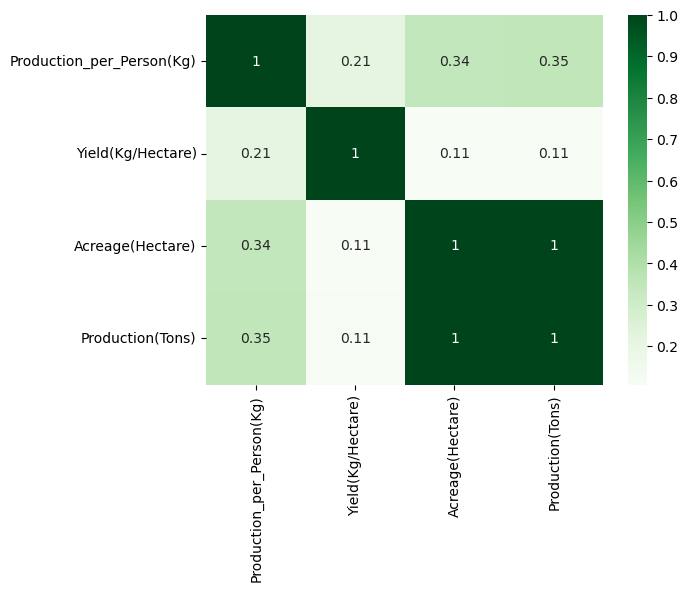

In [121]:
sns.heatmap(df_rel.corr(), annot= True, cmap='Greens')

### do countries with highest land produce more sugarcane

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

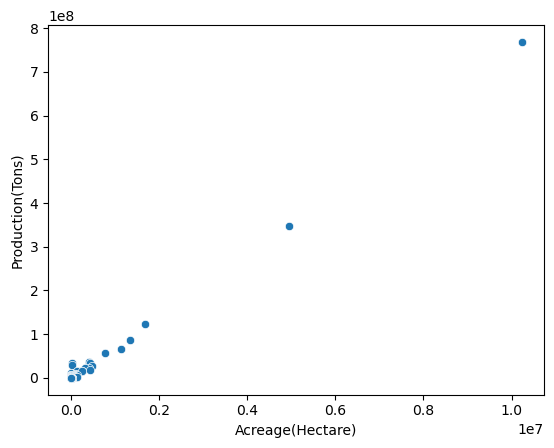

In [124]:
sns.scatterplot(df, x="Acreage(Hectare)", y="Production(Tons)")

### Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

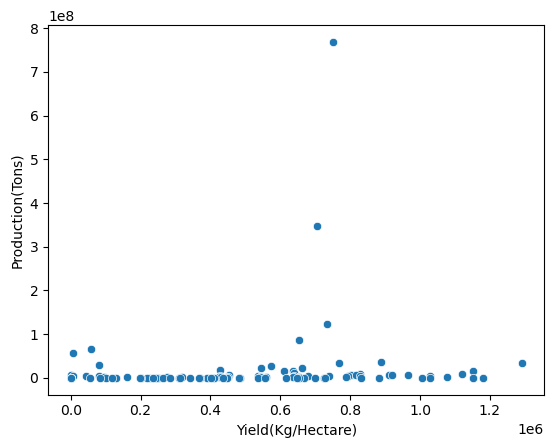

In [126]:
sns.scatterplot(df, x="Yield(Kg/Hectare)", y="Production(Tons)")

## Continent Analysis

In [176]:
df_continent=df.groupby('Continent').sum()

In [160]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,10144161.0,1439089.0,21850760.0
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,11197308.0
Europe,PortugalSpain,5823.0,536.0,71.0,1318709.0
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,9581162.0
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,1624191.0
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,6766896.0


## Which Continent produces maximum?

<Axes: >

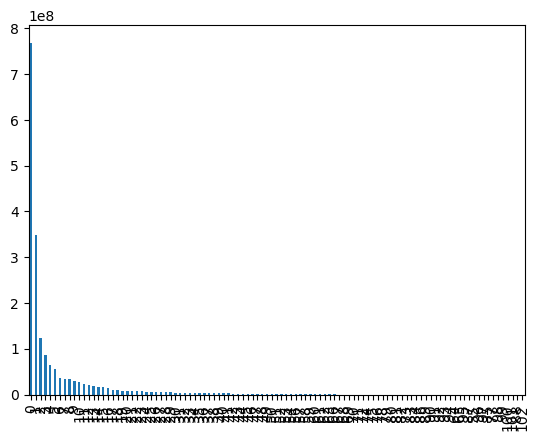

In [144]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')


In [145]:
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

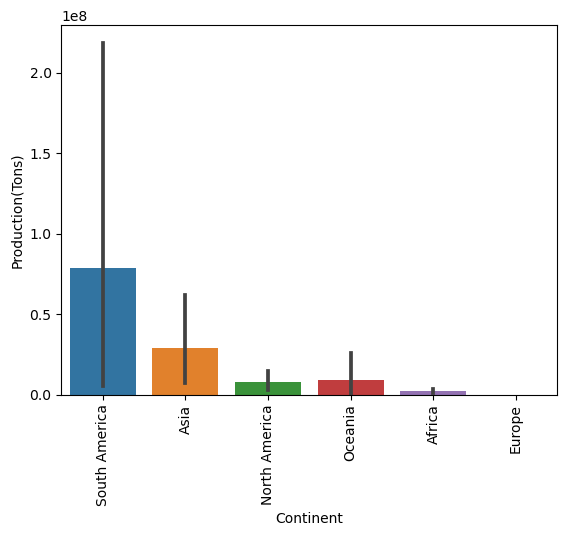

In [154]:
df_continent=df.sort_values('Production(Tons)', ascending=False)
ax4=sns.barplot(df_continent, x='Continent', y="Production(Tons)")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
plt.show()

### Continent with highest land

<Axes: xlabel='Continent'>

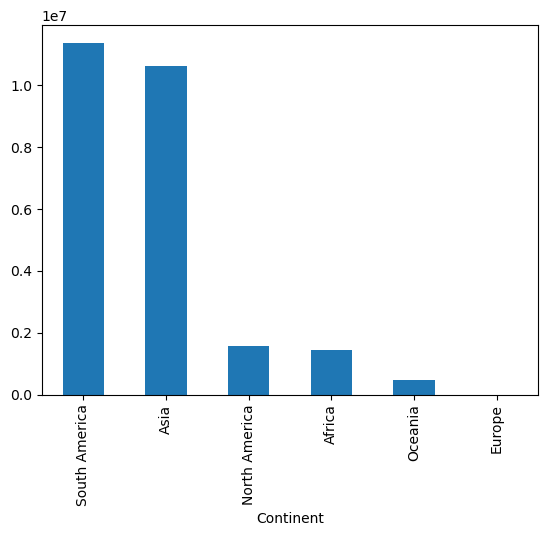

In [164]:
df_continent['Acreage(Hectare)'].sort_values(ascending=False).plot(kind='bar')

### Do number of countries in a Continent effects production of sugarcane?


In [181]:
df_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),no_of_countries
Continent,,,,,
Africa,89681525.0,10144161.0,1439089.0,21850760.0,39
Asia,721930425.0,3120808.0,10608319.0,11197308.0,25
Europe,5823.0,536.0,71.0,1318709.0,2
North America,173995947.0,15420953.0,1581983.0,9581162.0,22
Oceania,36177574.0,3158066.0,490909.0,1624191.0,4
South America,865588126.0,10228540.0,11369236.0,6766896.0,11


In [178]:
df_continent=df_continent.drop('Country', axis=1)

In [188]:
df.groupby("Continent").count()["Country"]

Continent
Africa           39
Asia             25
Europe            2
North America    22
Oceania           4
South America    11
Name: Country, dtype: int64

In [192]:
df_continent['no_of_countries']=df.groupby("Continent").count()["Country"]

In [193]:
df_continent.index.to_list()

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

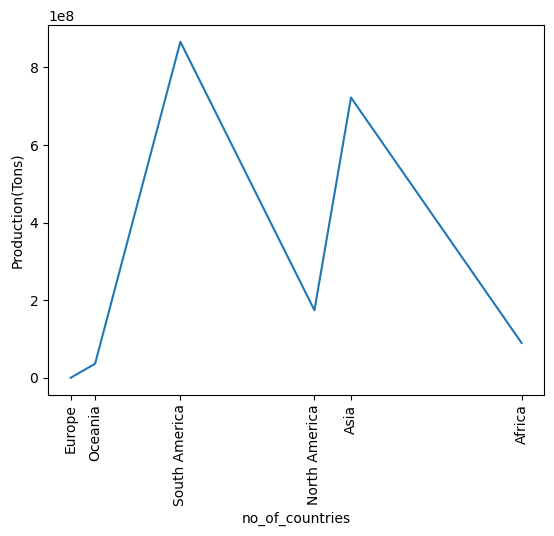

In [191]:
continent_names=df_continent.index.to_list()
sns.lineplot(df_continent, x='no_of_countries', y='Production(Tons)')
plt.xticks(df_continent['no_of_countries'], continent_names, rotation=90)
plt.show()

## Co-relation for continent

In [194]:
df_continent.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),no_of_countries
Production(Tons),1.000000,0.143098,0.994897,0.080904,0.098495
Production_per_Person(Kg),0.143098,1.000000,0.073058,0.504518,0.522610
Acreage(Hectare),0.994897,0.073058,1.000000,0.104012,0.122407
Yield(Kg/Hectare),0.080904,0.504518,0.104012,1.000000,0.982036
no_of_countries,0.098495,0.522610,0.122407,0.982036,1.000000


<Axes: >

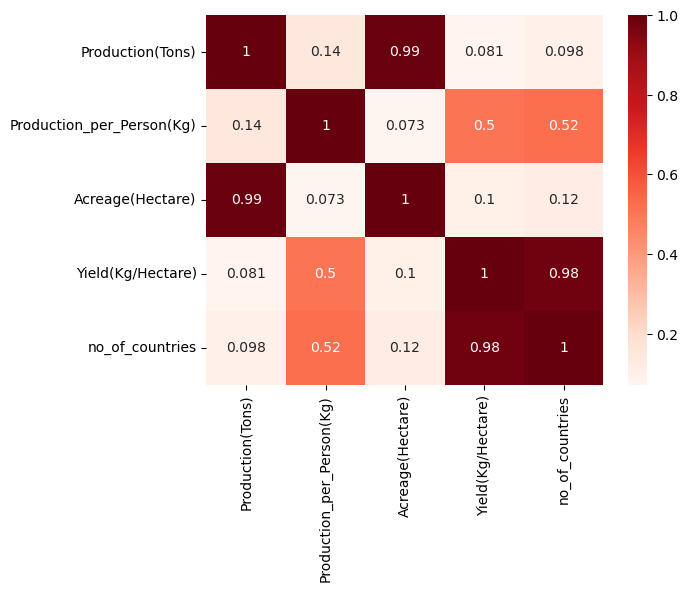

In [197]:
sns.heatmap(df_continent.corr(), annot=True, cmap='Reds')

## Do continent with highest land produces more sugarcane?

In [198]:
df_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),no_of_countries
Continent,,,,,
Africa,89681525.0,10144161.0,1439089.0,21850760.0,39
Asia,721930425.0,3120808.0,10608319.0,11197308.0,25
Europe,5823.0,536.0,71.0,1318709.0,2
North America,173995947.0,15420953.0,1581983.0,9581162.0,22
Oceania,36177574.0,3158066.0,490909.0,1624191.0,4
South America,865588126.0,10228540.0,11369236.0,6766896.0,11


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

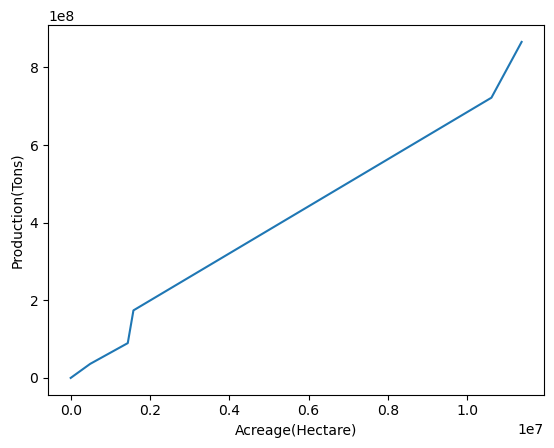

In [199]:
sns.lineplot(df_continent, x='Acreage(Hectare)', y='Production(Tons)')

### How much is each continent producing

<Axes: ylabel='Production(Tons)'>

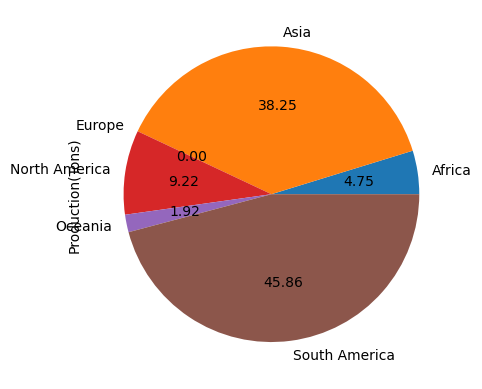

In [201]:
df_continent['Production(Tons)'].plot(kind='pie', autopct='%.2f')